In [15]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [10]:
# Target Search Term
target_terms = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")

# List to hold average sentiment
results_list = []

# List to hold individual sentiments
compound_results = []
tweet_dates = []
news_outlet = []

# Loop through all target users
for target in target_terms:

    # Variables for holding average sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    tweet_time = []
                
    # Run search around each tweet
    public_tweets = api.search(target, count=100)

    # Loop through all tweets
    for tweet in public_tweets["statuses"]:
                
        #Get the tweet time
        raw_time = tweet["created_at"] 
        converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")
        tweet_time.append(converted_time)
                
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])

        # Add each value to the appropriate individual tweet list 
        compound_results.append(results["compound"])
        tweet_dates.append(converted_time)
        news_outlet.append(target)

        # Add each value to the appropriate list to compute averages
        compound_list.append(results["compound"])
        positive_list.append(results["pos"])
        negative_list.append(results["neg"])
        neutral_list.append(results["neu"])

    # Create a dictionary of the average Sentiments
    sentiment = {
        "News Outlet": target,
        "Compound Score": np.mean(compound_list),
        "Postive Score": np.mean(positive_list),
        "Neutral Score": np.mean(neutral_list),
        "Negative Score": np.mean(negative_list)}

    # Print the Sentiments
    #print(sentiment)
    
    # Append the dictionary to results_list
    results_list.append(sentiment)
    
# Create dictionary of individual tweet information
ind_tweet = {
        "News Outlet": news_outlet,
        "Compound Score": np.mean(compound_list),
        "Date": tweet_dates}


In [28]:
# Create a DataFrame using results_list and display
results_df = pd.DataFrame(results_list).round(3)
results_df

,Compound Score,Negative Score,Neutral Score,News Outlet,Postive Score
0,0.003,0.034,0.929,@BBC,0.037
1,0.037,0.039,0.909,@CBS,0.052
2,-0.033,0.063,0.869,@CNN,0.068
3,-0.018,0.076,0.844,@FoxNews,0.080
4,-0.029,0.047,0.922,@nytimes,0.030


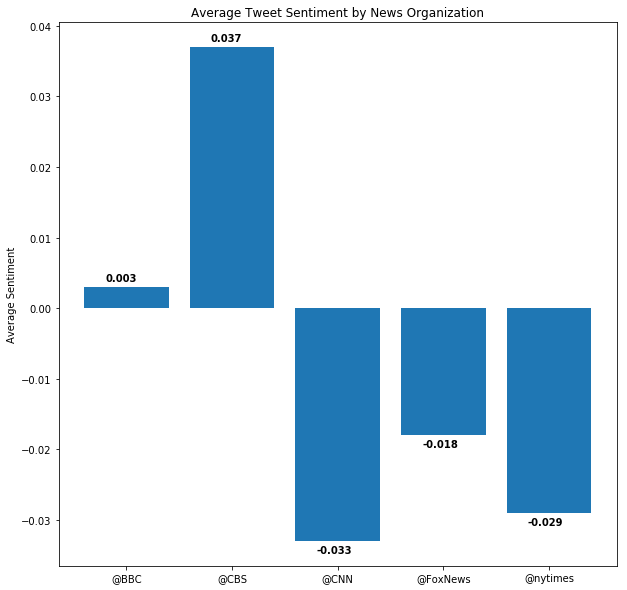

In [41]:
plt.figure(figsize=(10,10))
x_axis = np.arange(len(results_df))
plt.bar(x_axis, results_df["Compound Score"])
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, results_df["News Outlet"])
plt.title("Average Tweet Sentiment by News Organization")
#plt.xlabel("News Organization")
plt.ylabel("Average Sentiment")
#label the bars with sentiment value
for i, v in enumerate(results_df["Compound Score"]):
    if results_df["Compound Score"][i]<0:
        plt.text(i-0.2, v-0.002, str(v), color='black', va='bottom', fontweight='bold')
    else:
        plt.text(i-0.2, v+0.002, str(v), color='black', va='top', fontweight='bold')
        
plt.savefig("AvgSentiment.png")

In [20]:
# Create a DataFrame using individual tweet results and display
ind_results_df = pd.DataFrame(ind_tweet).set_index("Date")
ind_results_df.head()

,News Outlet,Compound Score
Date,,
2018-09-29 01:13:53+00:00,@BBC,-0.029373
2018-09-29 01:12:32+00:00,@BBC,-0.029373
2018-09-29 01:10:46+00:00,@BBC,-0.029373
2018-09-29 01:10:20+00:00,@BBC,-0.029373
2018-09-29 01:10:20+00:00,@BBC,-0.029373


In [21]:
plt.scatter(ind_results_df["Date"], ind_results_df["Compound Score"])

KeyError: 'Date'